In [195]:
import os
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [196]:
# Read dataset to a dataframe
df = pd.read_csv('Kidney Patients Data.csv',encoding='windows-1254')

df.head()

,Name,Age,Gender,Address,Education,Job ( clerical/forces /agriculture/ labor/retired/ other),Monthly Income,Source of water for drinking(tube well/public well/private well/pipe bourn),Smorking or not,Using alcohol or not,Using betel nut or not,Do you have any of this disorders diabetes/stress/blood pressure,TP,Having kidney disease
0,Yasawathi Karunarathna,46,Female,"Abayapura Rd, Padaviya",Primary,Forces,70000,Public well,Smoking,Yes,Yes,No,746985260.0,Yes
1,Wimalaweera,66,Male,"Ikiriwawa Rd ,Thmbuthegama",05 grade,Other,33500,Public well,Smoking,No,No,No,703569874.0,Yes
2,Wimalawathi,50,Female,"Ambalama Mawatha,Mahadivulwawa, Kakirawa",OL,Other,37000,Public well,Not smoking,No,No,No,758952834.0,Yes
3,Wijitha Amunugama,57,Male,"Labunoruwa ,Thirippane",AL,Retired,24500,Public well,Smoking,No,No,No,745296325.0,Yes
4,Wasanthi,50,Female,"Kala Gama,Thmbuthegama",AL,Retired,25000,Tube well,Smoking,Yes,Yes,No,375832456.0,Yes


In [197]:
df.columns

Index(['Name', 'Age', 'Gender', 'Address', 'Education',
       'Job ( clerical/forces  /agriculture/ labor/retired/ other)',
       'Monthly Income',
       'Source of water for drinking(tube well/public well/private well/pipe bourn)',
       'Smorking or not', 'Using alcohol or not', 'Using betel nut or not',
       'Do you have any of this disorders diabetes/stress/blood pressure ',
       'TP', 'Having kidney disease'],
      dtype='object')

In [198]:
df.dtypes

Name                                                                            object
Age                                                                              int64
Gender                                                                          object
Address                                                                         object
Education                                                                       object
Job ( clerical/forces  /agriculture/ labor/retired/ other)                      object
Monthly Income                                                                   int64
Source of water for drinking(tube well/public well/private well/pipe bourn)     object
Smorking or not                                                                 object
Using alcohol or not                                                            object
Using betel nut or not                                                          object
Do you have any of this disorders diabetes/

In [199]:
df = df.drop(['Name', 'Address','TP'], axis=1)

In [200]:
df.isnull().sum()

Age                                                                             0
Gender                                                                          0
Education                                                                       1
Job ( clerical/forces  /agriculture/ labor/retired/ other)                      0
Monthly Income                                                                  0
Source of water for drinking(tube well/public well/private well/pipe bourn)     2
Smorking or not                                                                 3
Using alcohol or not                                                            0
Using betel nut or not                                                          0
Do you have any of this disorders diabetes/stress/blood pressure               10
Having kidney disease                                                           0
dtype: int64

In [201]:
df.dropna(inplace=True)

In [202]:
cols = ['Gender', 'Education',
       'Job ( clerical/forces  /agriculture/ labor/retired/ other)',
       'Source of water for drinking(tube well/public well/private well/pipe bourn)',
       'Smorking or not', 'Using alcohol or not', 'Using betel nut or not',
       'Do you have any of this disorders diabetes/stress/blood pressure ', 'Having kidney disease']
df[cols] = df[cols].apply(LabelEncoder().fit_transform)
df.head()

,Age,Gender,Education,Job ( clerical/forces /agriculture/ labor/retired/ other),Monthly Income,Source of water for drinking(tube well/public well/private well/pipe bourn),Smorking or not,Using alcohol or not,Using betel nut or not,Do you have any of this disorders diabetes/stress/blood pressure,Having kidney disease
0,46,0,13,2,70000,2,2,1,1,1,1
1,66,1,1,4,33500,2,2,0,0,1,1
2,50,0,12,4,37000,2,1,0,0,1,1
3,57,1,8,5,24500,2,2,0,0,1,1
4,50,0,8,5,25000,4,2,1,1,1,1


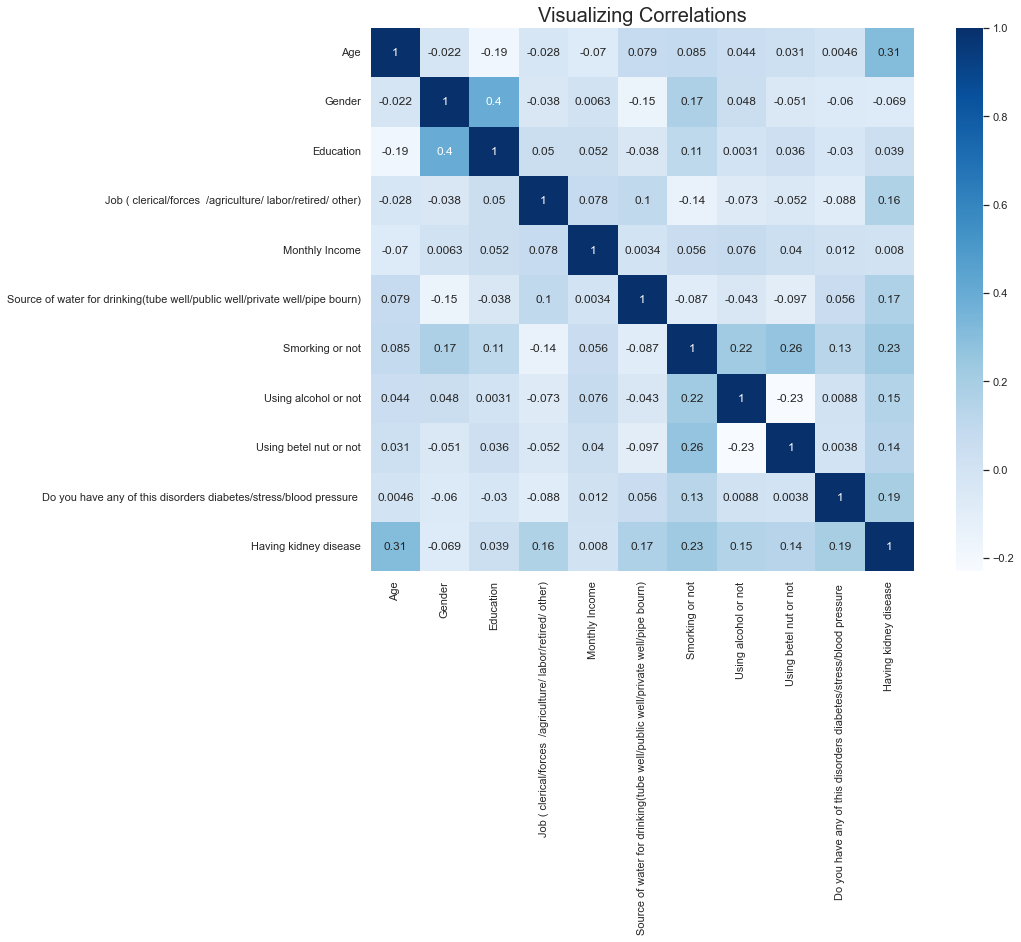

In [203]:
plt.figure(figsize = (15, 10))
sns.heatmap(df.corr(), cmap = 'Blues', square = True, annot = True)
plt.title("Visualizing Correlations", size = 20)
plt.show()

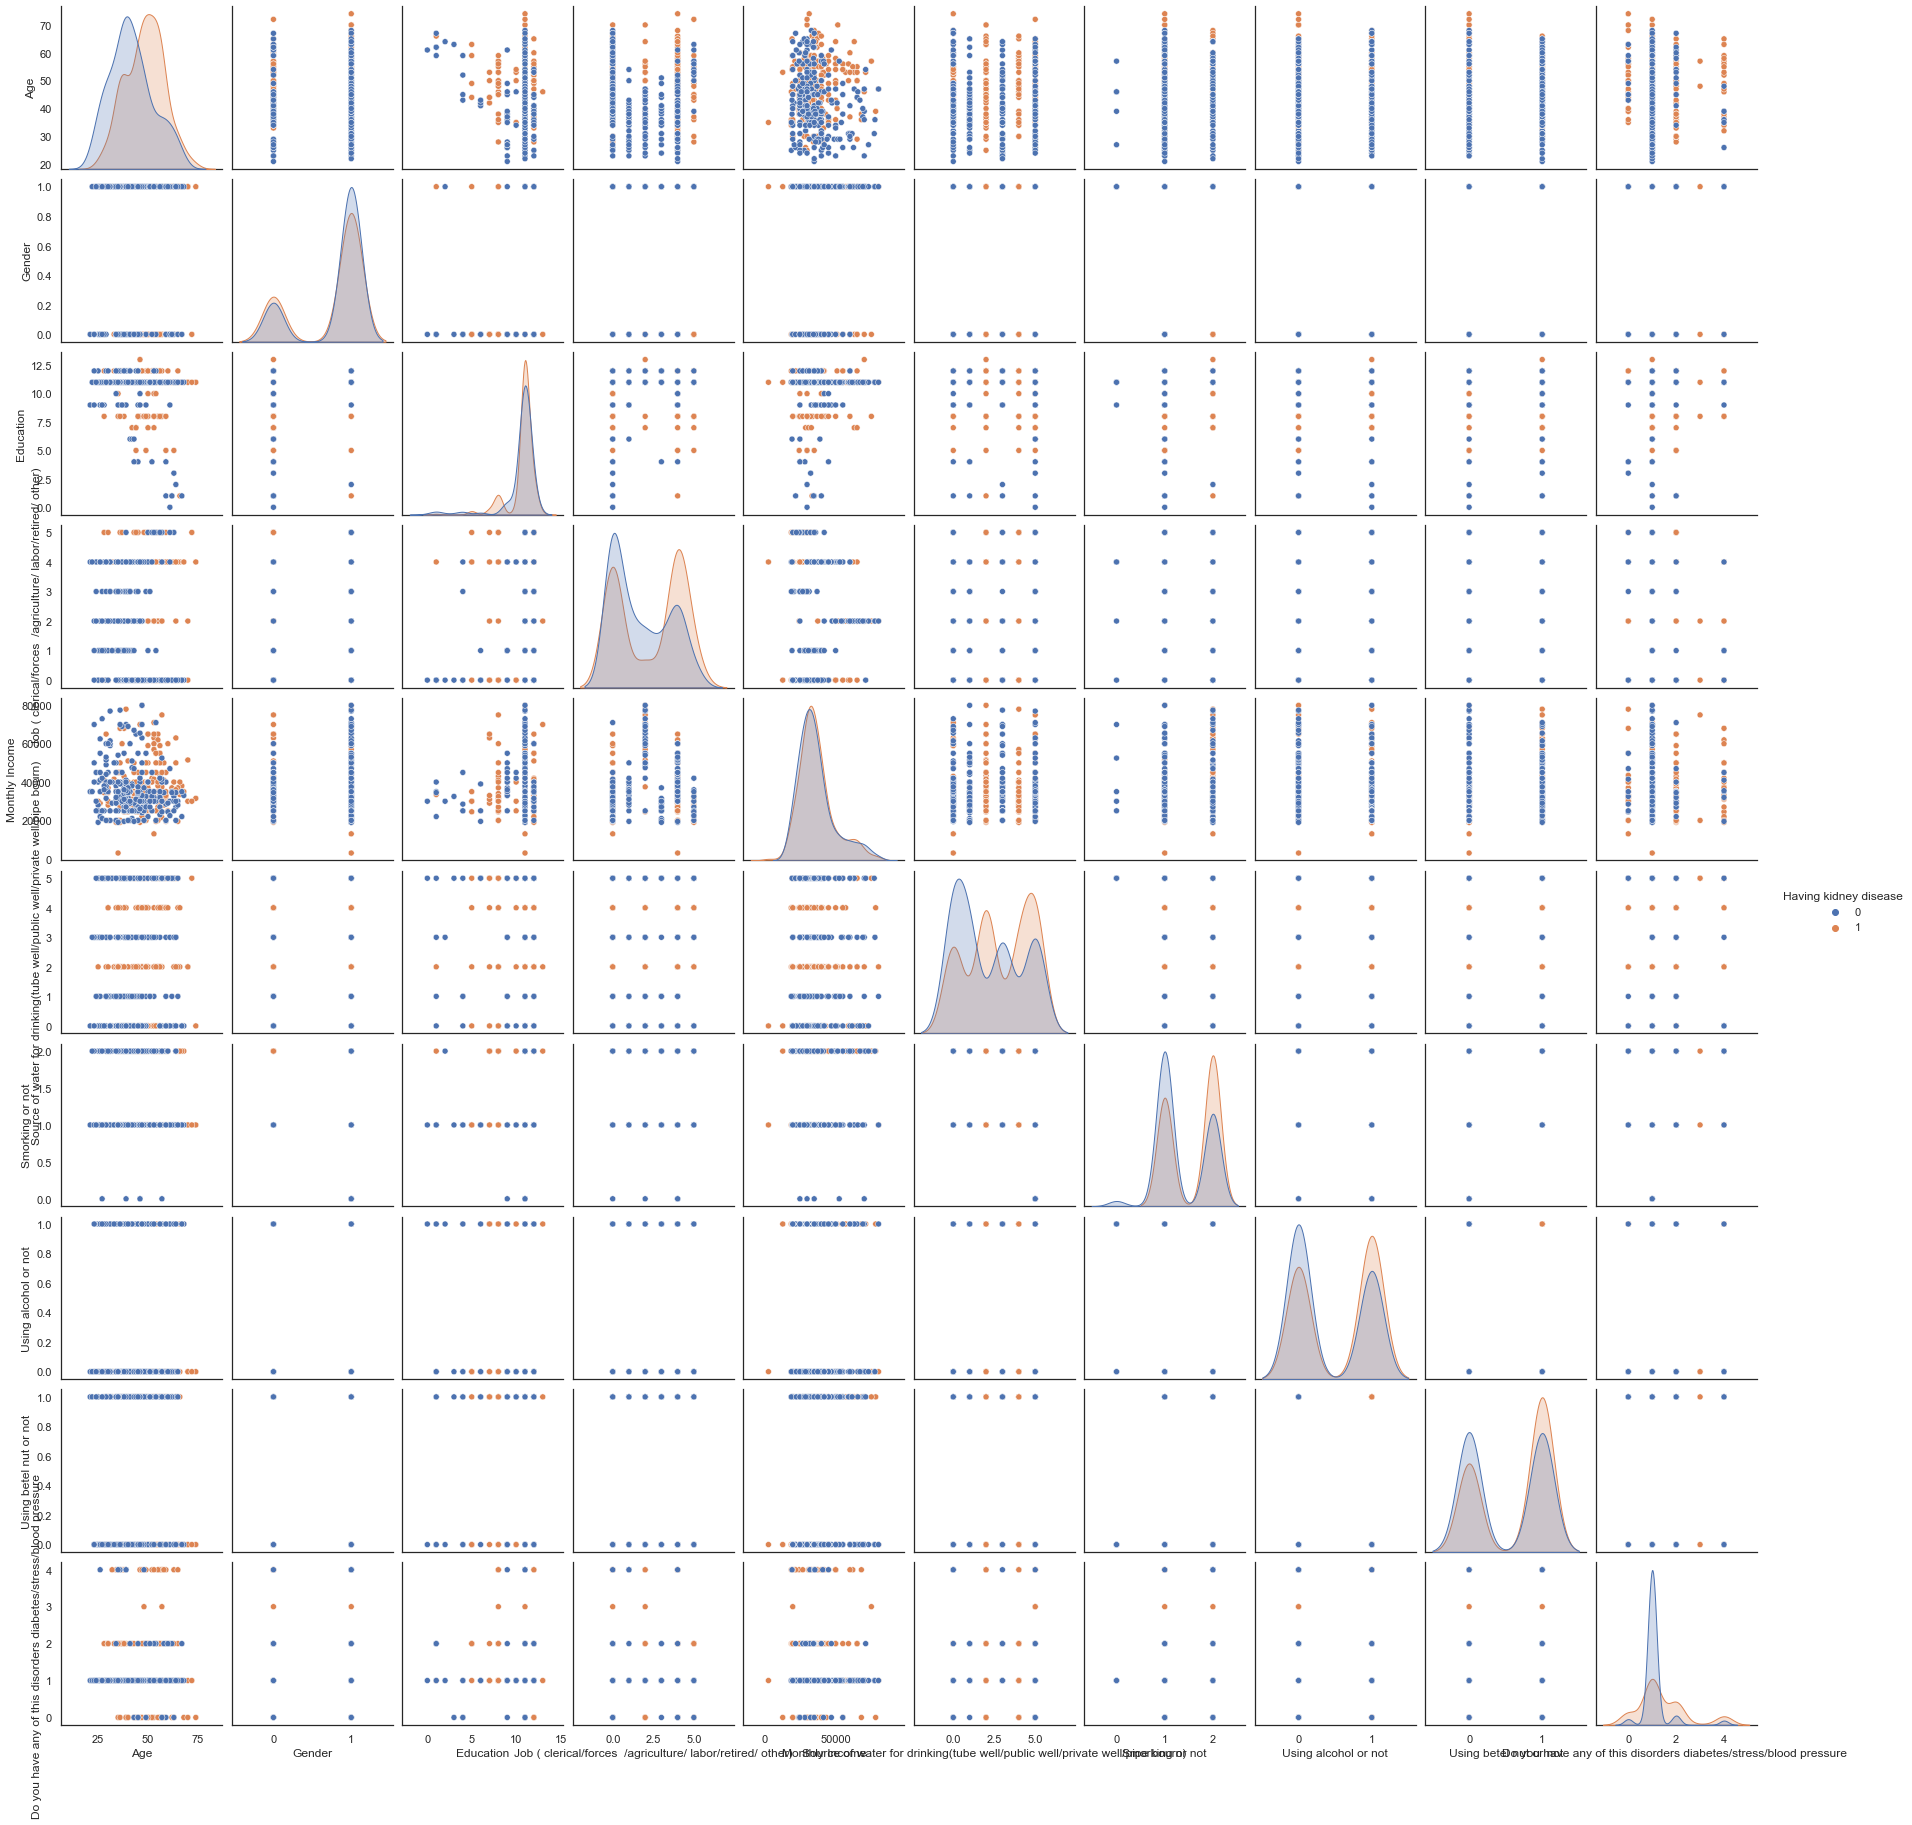

In [204]:
sns.pairplot(df,hue='Having kidney disease')

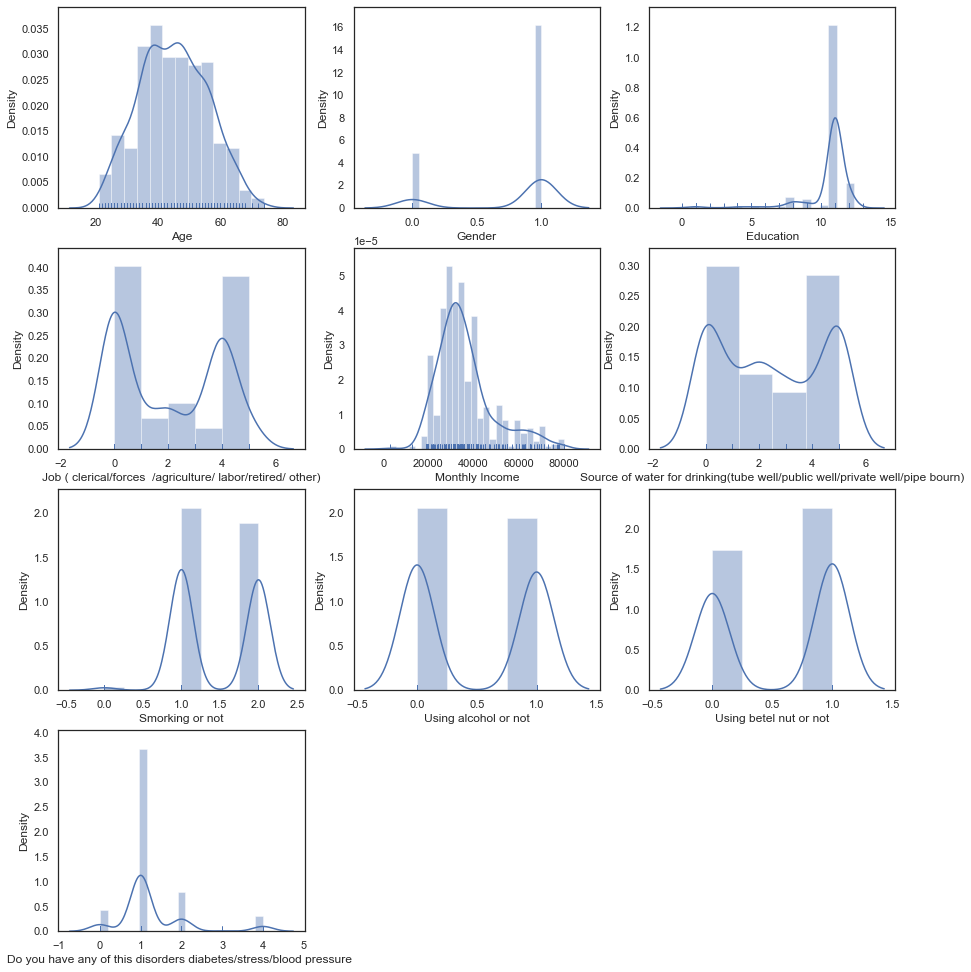

In [205]:
columns=df.columns
columns=list(columns)
columns.pop()

sns.set(rc={'figure.figsize':(15,17)})
sns.set_style(style='white')

for i in range(len(columns)):
    plt.subplot(4,3,i+1)
    sns.distplot(df[columns[i]], hist=True, rug=True, color='b')

In [206]:
df.columns

Index(['Age', 'Gender', 'Education',
       'Job ( clerical/forces  /agriculture/ labor/retired/ other)',
       'Monthly Income',
       'Source of water for drinking(tube well/public well/private well/pipe bourn)',
       'Smorking or not', 'Using alcohol or not', 'Using betel nut or not',
       'Do you have any of this disorders diabetes/stress/blood pressure ',
       'Having kidney disease'],
      dtype='object')

In [207]:
x = df[['Age', 'Gender', 'Education',
       'Job ( clerical/forces  /agriculture/ labor/retired/ other)',
       'Source of water for drinking(tube well/public well/private well/pipe bourn)',
       'Smorking or not', 'Using alcohol or not', 'Using betel nut or not',
       'Do you have any of this disorders diabetes/stress/blood pressure ',]].values


y = df['Having kidney disease'].values

In [208]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=100,test_size=0.25)

In [209]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)

x_test = scaler.transform(x_test)

In [210]:
x_train = pd.DataFrame(x_train, columns=[cols])
x_test = pd.DataFrame(x_test, columns=[cols])

In [211]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc=SVC() 

svc.fit(x_train,y_train)

y_pred=svc.predict(x_test)

print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.8595


In [212]:
x_train.shape
y_train.shape

(361,)

In [213]:
y_pred = svc.predict(x_test)
y_pred

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0])

In [214]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.14049586776859505

In [215]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.37482778414706003

In [216]:
from sklearn.metrics import roc_curve,auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred)
roc_auc = auc(false_positive_rate,true_positive_rate)
roc_auc

0.8594262295081967

In [217]:
svc.score(x_test,y_test)

0.859504132231405

Confusion matrix

 [[53  8]
 [ 9 51]]


<AxesSubplot:>

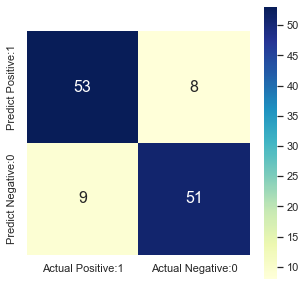

In [222]:
# visualize confusion matrix with seaborn heatmap
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm_matrix, annot=True, cmap='YlGnBu',square=True, ax=ax, annot_kws={"fontsize":16})

In [219]:
svc.predict([[46,0,13,2,70000,2,2,1,1]])

array([1])

In [220]:
# import pickle
# pickle.dump(clf, open('model.pkl','wb'))

In [221]:
# model = pickle.load(open('model.pkl','rb'))
# print(clf.predict([[1,1,1,1,1,1,1,1,1]]))